In [ ]:
### Contributions
# Tasks were distributed as follows:
# [Wenhan Zhan]: [Part 1 in EDA]
# [Ruoyao Yan]: [Part 1 in Data Cleaning, Part 4,7 in EDA, Part 5 in Advanced Analysis, Part 1,2,3 in Prediction]
# [Jun Sun]: [Part 2 in Data Cleaning, Part 1,2,3,5,6 in EDA, Part 1,2,3,4 in Advanced Analysis, Part 3 in Prediction]
# [Junxiang Wang]: [Part 1 in EDA]

# 1. Data Cleaning

In [3]:
# Module: [Data Cleaning1]
# Contributor: [Ruoyao Yan]
import pandas as pd

df = pd.read_csv('Topic1_english_pl_dataset.csv')

#data cleaning
print("missing value statistics:")
print(df.isnull().sum())

numeric_cols = ['FullTimeHomeGoals', 'FullTimeAwayGoals', 'HalfTimeHomeGoals',
                'HalfTimeAwayGoals', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget',
                'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
                'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
                'AwayRedCards']

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
categorical_cols = ['FullTimeResult', 'HalfTimeResult', 'HomeTeam', 'AwayTeam']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#check check check check list
df.loc[df['FullTimeHomeGoals'] < 0, 'FullTimeHomeGoals'] = 0
df.loc[df['FullTimeAwayGoals'] < 0, 'FullTimeAwayGoals'] = 0
df.loc[df['HalfTimeHomeGoals'] < 0, 'HalfTimeHomeGoals'] = 0
df.loc[df['HalfTimeAwayGoals'] < 0, 'HalfTimeAwayGoals'] = 0


mask = df['HalfTimeHomeGoals'] > df['FullTimeHomeGoals']
df.loc[mask, 'HalfTimeHomeGoals'] = df.loc[mask, 'FullTimeHomeGoals']

mask = df['HalfTimeAwayGoals'] > df['FullTimeAwayGoals']
df.loc[mask, 'HalfTimeAwayGoals'] = df.loc[mask, 'FullTimeAwayGoals']

df['FullTimeHomeGoals'] = df['FullTimeHomeGoals'].astype(int)
df['FullTimeAwayGoals'] = df['FullTimeAwayGoals'].astype(int)
df['HomeShotsOnTarget'] = df['HomeShotsOnTarget'].astype(int)
df['HomeFouls'] = df['HomeFouls'].astype(int)
df['HalfTimeAwayGoals'] = df['HalfTimeAwayGoals'].astype(int)
df['AwayRedCards'] = df['AwayRedCards'].astype(int)

valid_results = ['H', 'D', 'A']
df['FullTimeResult'] = df['FullTimeResult'].apply(lambda x: x if x in valid_results else df['FullTimeResult'].mode()[0])


def check_result_consistency(row):
    if row['FullTimeHomeGoals'] > row['FullTimeAwayGoals'] and row['FullTimeResult'] != 'H':
        return False
    elif row['FullTimeHomeGoals'] < row['FullTimeAwayGoals'] and row['FullTimeResult'] != 'A':
        return False
    elif row['FullTimeHomeGoals'] == row['FullTimeAwayGoals'] and row['FullTimeResult'] != 'D':
        return False
    return True


df['Consistent'] = df.apply(check_result_consistency, axis=1)
inconsistent = df[~df['Consistent']]

for idx, row in inconsistent.iterrows():
    if row['FullTimeHomeGoals'] > row['FullTimeAwayGoals']:
        df.at[idx, 'FullTimeResult'] = 'H'
    elif row['FullTimeHomeGoals'] < row['FullTimeAwayGoals']:
        df.at[idx, 'FullTimeResult'] = 'A'
    else:
        df.at[idx, 'FullTimeResult'] = 'D'

df['HomeShots'] = df[['HomeShots', 'HomeShotsOnTarget']].max(axis=1)
df['AwayShots'] = df[['AwayShots', 'AwayShotsOnTarget']].max(axis=1)

df.drop('Consistent', axis=1, inplace=True)

df.to_csv('cleaned_football_data.csv', index=False)
print("data has been cleaned and saved！")
print("\nMissing value statistics after cleaning:")
print(df.isnull().sum())

#for ppt
print("\ncleaned data sample:")
print(df.head())
time_df = pd.DataFrame({
    'MatchDate': ['2000-08-19', '2001-09-20', '#######', '2003-07-01']
})

time_df['MatchDate'] = pd.to_datetime(time_df['MatchDate'].replace('#######', pd.NaT), errors='coerce')

print(time_df)

def determine_outcome(home_goals, away_goals):
    if home_goals > away_goals:
        return 'Home Win'
    elif home_goals < away_goals:
        return 'Away Win'
    else:
        return 'Draw'


df['MatchOutcome'] = df.apply(
    lambda row: determine_outcome(row['FullTimeHomeGoals'], row['FullTimeAwayGoals']),
    axis=1
)

print(df[['MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals', 'FullTimeAwayGoals', 'MatchOutcome']].head())

count_home = (df['FullTimeResult'] == 'H').sum()
print(f"Total home win: {count_home}")
count_away = (df['FullTimeResult'] == 'A').sum()
print(f"Total away win: {count_away}")
print("This shows that they have a higher winning rate play at home compare to play away")
num_teams = df['HomeTeam'].nunique()
print(f"total numbers of football teams: {num_teams}")

missing value statistics:
Season                 0
MatchDate              0
HomeTeam               0
AwayTeam               0
FullTimeHomeGoals      0
FullTimeAwayGoals    469
FullTimeResult         0
HalfTimeHomeGoals      0
HalfTimeAwayGoals    188
HalfTimeResult         0
HomeShots              0
AwayShots              0
HomeShotsOnTarget    281
AwayShotsOnTarget      0
HomeCorners            0
AwayCorners            0
HomeFouls             94
AwayFouls              0
HomeYellowCards        0
AwayYellowCards        0
HomeRedCards           0
AwayRedCards         563
dtype: int64
data has been cleaned and saved！

Missing value statistics after cleaning:
Season               0
MatchDate            0
HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners   

In [4]:
# Module: [Data Cleaning2]
# Contributor: [Jun Sun]
import pandas as pd
df = pd.read_csv('cleaned_football_data.csv')
df['HomeGoalDifference'] = df['FullTimeHomeGoals'] - df['FullTimeAwayGoals']
df['AwayGoalDifference'] = df['FullTimeAwayGoals'] - df['FullTimeHomeGoals']
df['GoalDifference'] = df['HomeGoalDifference']
df.to_csv('cleaned_football_data.csv', index=False)
import pandas as pd
df = pd.read_csv('cleaned_football_data.csv')
print(df.head())

    Season   MatchDate  HomeTeam       AwayTeam  FullTimeHomeGoals  \
0  2000/01  2000-08-19  Charlton       Man City                  4   
1  2000/01  2000-08-19   Chelsea       West Ham                  4   
2  2000/01  2000-08-19  Coventry  Middlesbrough                  1   
3  2000/01  2000-08-19     Derby    Southampton                  2   
4  2000/01  2000-08-19     Leeds        Everton                  2   

   FullTimeAwayGoals FullTimeResult  HalfTimeHomeGoals  HalfTimeAwayGoals  \
0                  0              H                  2                  0   
1                  2              H                  1                  0   
2                  3              A                  1                  1   
3                  2              D                  1                  2   
4                  0              H                  2                  0   

  HalfTimeResult  ...  AwayCorners  HomeFouls  AwayFouls  HomeYellowCards  \
0              H  ...            6     

# 2. Basic Exploratory Data Analysis (EDA)
2.1 Trends in number of matches played (by season)

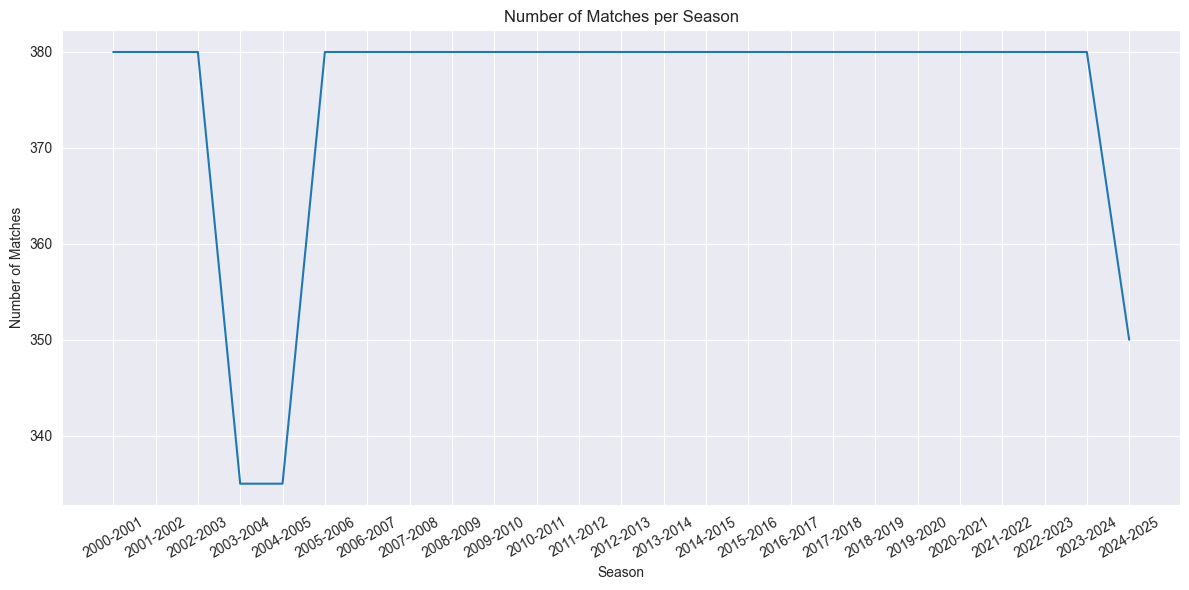

In [5]:
# Module: [EDA1]
# Contributor: [Wenhan Zhan] and [Junxiang Wang]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_football_data.csv")

df['MatchDate'] = pd.to_datetime(df['MatchDate'])

def get_season(date):
    if date.month >= 8:
        return f"{date.year}-{date.year+1}"
    else:
        return f"{date.year-1}-{date.year}"

df['Season'] = df['MatchDate'].apply(get_season)

season_counts = df['Season'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=season_counts.index,y=season_counts.values,markers='o')
plt.xticks(rotation = 30)
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

# Trends in number of matches played (by Months)

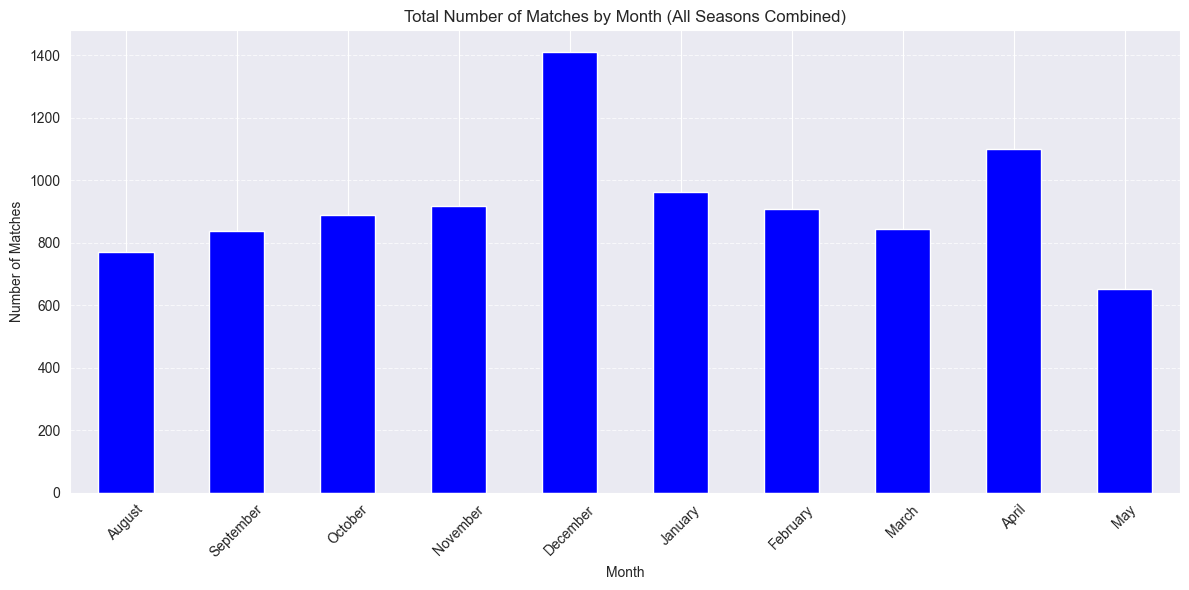

In [6]:
# Module: [EDA2]
# Contributor: [Jun Sun]
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv(
    'cleaned_football_data.csv')

def is_valid_date(date_str):
    try:
        datetime.strptime(date_str, "%Y-%m-%d")  # Change format if needed
        return True
    except:
        return False

valid_dates = df['MatchDate'].apply(is_valid_date)

df = df[valid_dates]

df['MatchDate'] = pd.to_datetime(df['MatchDate'])

df['Month'] = df['MatchDate'].dt.month_name()

month_order = ['August', 'September', 'October', 'November', 'December',
               'January', 'February', 'March', 'April', 'May']

monthly_matches = df['Month'].value_counts().reindex(month_order)

plt.figure(figsize=(12, 6))
monthly_matches.plot(kind='bar', color='blue')
plt.title('Total Number of Matches by Month (All Seasons Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Distribution of home and away team goals (bar chart)

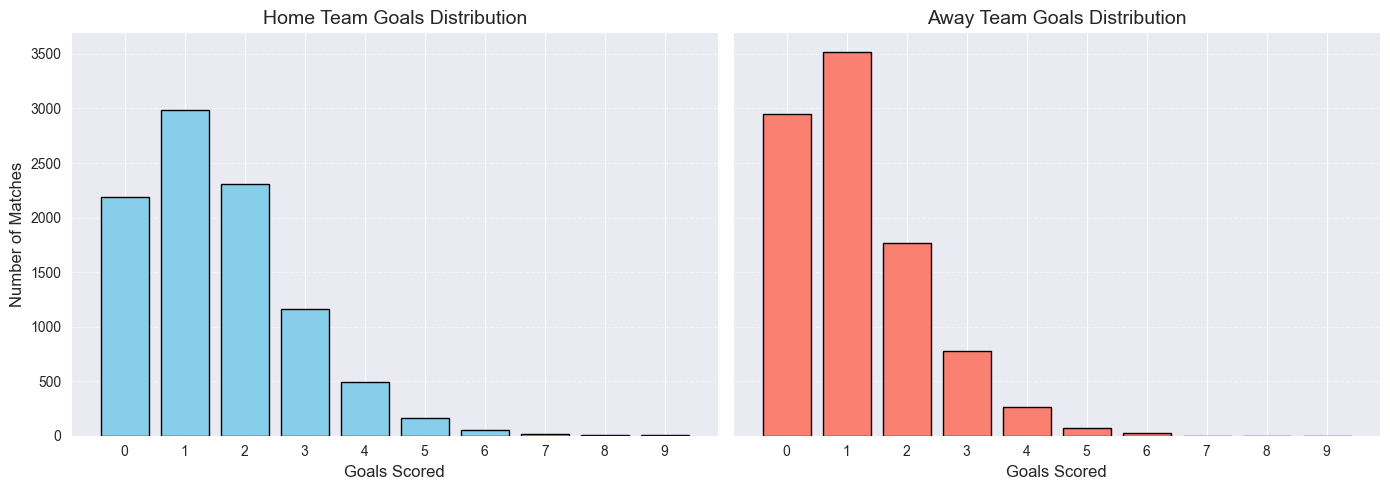

In [7]:
# Module: [EDA3]
# Contributor: [Jun Sun]
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    'cleaned_football_data.csv')

home_goals = df['FullTimeHomeGoals'].value_counts().sort_index()
away_goals = df['FullTimeAwayGoals'].value_counts().sort_index()

max_goals = max(home_goals.index.max(), away_goals.index.max())
x_range = range(0, max_goals + 1)

home_goals = home_goals.reindex(x_range, fill_value=0)
away_goals = away_goals.reindex(x_range, fill_value=0)

fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

ax[0].bar(home_goals.index, home_goals.values, color='skyblue', edgecolor='black')
ax[0].set_title('Home Team Goals Distribution', fontsize=14)
ax[0].set_xlabel('Goals Scored', fontsize=12)
ax[0].set_ylabel('Number of Matches', fontsize=12)
ax[0].set_xticks(x_range)
ax[0].grid(axis='y', linestyle='--', alpha=0.5)

ax[1].bar(away_goals.index, away_goals.values, color='salmon', edgecolor='black')
ax[1].set_title('Away Team Goals Distribution', fontsize=14)
ax[1].set_xlabel('Goals Scored', fontsize=12)
ax[1].set_xticks(x_range)
ax[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


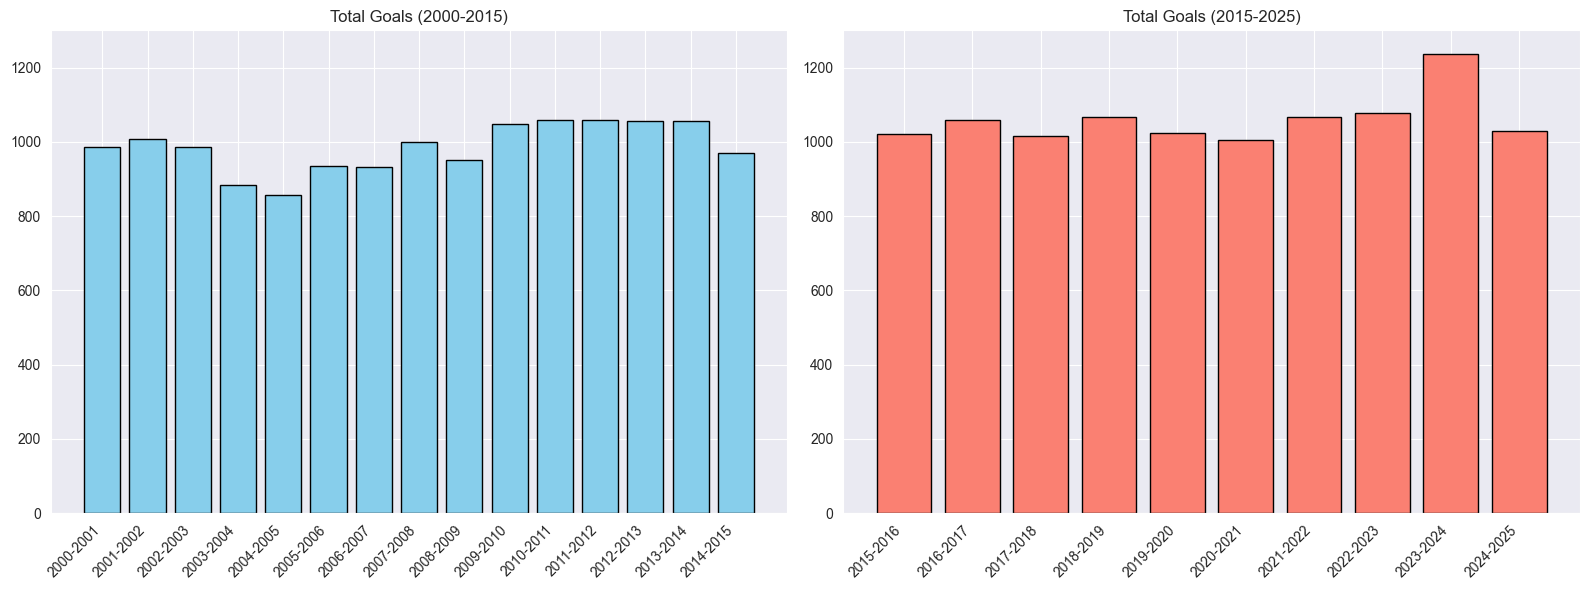

In [8]:
# Module: [EDA4]
# Contributor: [Ruoyao Yan]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("cleaned_football_data.csv")
df['MatchDate'] = pd.to_datetime(df['MatchDate'])

def get_season(date):
    if date.month >= 8:
        return f"{date.year}-{date.year+1}"
    else:
        return f"{date.year-1}-{date.year}"

df['Season'] = df['MatchDate'].apply(get_season)
season_goals = df.groupby('Season')[['FullTimeHomeGoals', 'FullTimeAwayGoals']].sum().sum(axis=1)
first_15_seasons = [s for s in season_goals.index if int(s.split('-')[0]) <= 2014]
last_10_seasons = [s for s in season_goals.index if 2015 <= int(s.split('-')[0]) <= 2024]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(range(len(first_15_seasons)),
        season_goals[first_15_seasons].values,
        color='skyblue', edgecolor='black')
ax1.set_title('Total Goals (2000-2015)')
ax1.set_xticks(range(len(first_15_seasons)))
ax1.set_xticklabels(first_15_seasons, rotation=45, ha='right')
ax1.set_ylim(0, 1300)
ax2.bar(range(len(last_10_seasons)),
        season_goals[last_10_seasons].values,
        color='salmon', edgecolor='black')
ax2.set_title('Total Goals (2015-2025)')
ax2.set_xticks(range(len(last_10_seasons)))
ax2.set_xticklabels(last_10_seasons, rotation=45, ha='right')
ax2.set_ylim(0, 1300)
plt.tight_layout()
plt.show()

## Full-time/half-time result ratio (pie chart)

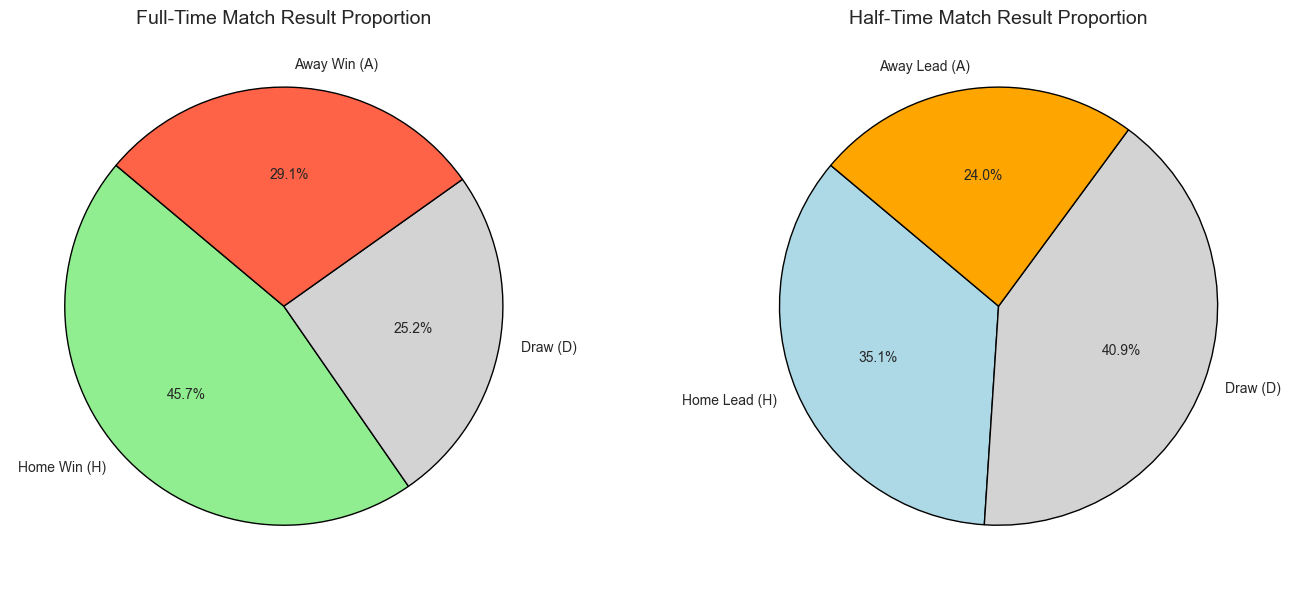

In [9]:
# Module: [EDA5]
# Contributor: [Jun Sun]
import matplotlib.pyplot as plt

result_order = ['H', 'D', 'A']

fulltime_counts = df['FullTimeResult'].value_counts().reindex(result_order, fill_value=0)
fulltime_labels = ['Home Win (H)', 'Draw (D)', 'Away Win (A)']
fulltime_colors = ['lightgreen', 'lightgray', 'tomato']


halftime_counts = df['HalfTimeResult'].value_counts().reindex(result_order, fill_value=0)
halftime_labels = ['Home Lead (H)', 'Draw (D)', 'Away Lead (A)']
halftime_colors = ['lightblue', 'lightgray', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].pie(fulltime_counts, labels=fulltime_labels, autopct='%1.1f%%',
          colors=fulltime_colors, startangle=140, wedgeprops={'edgecolor': 'black'})
ax[0].set_title('Full-Time Match Result Proportion', fontsize=14)

# Half-Time Pie Chart
ax[1].pie(halftime_counts, labels=halftime_labels, autopct='%1.1f%%',
          colors=halftime_colors, startangle=140, wedgeprops={'edgecolor': 'black'})
ax[1].set_title('Half-Time Match Result Proportion', fontsize=14)

plt.tight_layout()
plt.show()


## Home vs Away Win Percentage (bar graph)

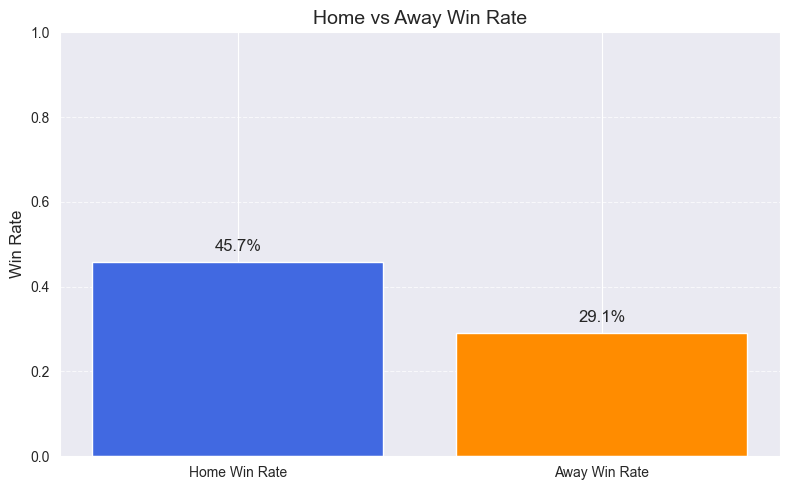

In [10]:
# Module: [EDA6]
# Contributor: [Jun Sun]
import matplotlib.pyplot as plt

total_matches = len(df)
total_home_matches = df['HomeTeam'].count()
total_away_matches = df['AwayTeam'].count()

num_home_wins = (df['FullTimeResult'] == 'H').sum()
num_away_wins = (df['FullTimeResult'] == 'A').sum()

home_win_rate = num_home_wins / total_home_matches
away_win_rate = num_away_wins / total_away_matches

win_rate_data = {
    'Home Win Rate': home_win_rate,
    'Away Win Rate': away_win_rate
}


fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(win_rate_data.keys(), win_rate_data.values(), color=['royalblue', 'darkorange'])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f'{height:.1%}', ha='center', va='bottom', fontsize=12)

ax.set_title('Home vs Away Win Rate', fontsize=14)
ax.set_ylabel('Win Rate', fontsize=12)
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

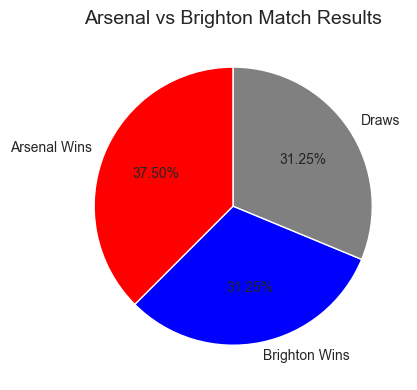

In [11]:
# Module: [EDA7]
# Contributor: [Ruoyao Yan]
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('cleaned_football_data.csv')

# Filter Arsenal vs Brighton matches
AvsB = []
for index, row in df.iterrows():
    home = row['HomeTeam']
    away = row['AwayTeam']
    if (home == 'Arsenal' and away == 'Brighton') or (home == 'Brighton' and away == 'Arsenal'):
        AvsB.append(row)

arsenal_vs_brighton = pd.DataFrame(AvsB)

total_arsenal_wins = len(arsenal_vs_brighton[
    ((arsenal_vs_brighton['HomeTeam'] == 'Arsenal') & (arsenal_vs_brighton['FullTimeResult'] == 'H')) |
    ((arsenal_vs_brighton['AwayTeam'] == 'Arsenal') & (arsenal_vs_brighton['FullTimeResult'] == 'A'))
])
total_brighton_wins = len(arsenal_vs_brighton[
    ((arsenal_vs_brighton['HomeTeam'] == 'Brighton') & (arsenal_vs_brighton['FullTimeResult'] == 'H')) |
    ((arsenal_vs_brighton['AwayTeam'] == 'Brighton') & (arsenal_vs_brighton['FullTimeResult'] == 'A'))
])
total_draws = len(arsenal_vs_brighton[arsenal_vs_brighton['FullTimeResult'] == 'D'])

labels = ['Arsenal Wins', 'Brighton Wins', 'Draws']
counts = [total_arsenal_wins, total_brighton_wins, total_draws]
colors = ['red', 'blue', 'grey']

plt.figure(figsize=(6, 4))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
)

plt.title('Arsenal vs Brighton Match Results', fontsize=14)
plt.tight_layout()
plt.show()


# 3. Advanced Statistical Analysis

Average shots per match, shots on target, and goal conversion rate

In [13]:
# Module: [Advanced Analysis1]
# Contributor: [Jun Sun]
df.fillna({
    'HomeShots': 0, 'AwayShots': 0,
    'HomeShotsOnTarget': 0, 'AwayShotsOnTarget': 0,
    'FullTimeHomeGoals': 0, 'FullTimeAwayGoals': 0
}, inplace=True)

df['TotalShots'] = df['HomeShots'] + df['AwayShots']
df['TotalShotsOnTarget'] = df['HomeShotsOnTarget'] + df['AwayShotsOnTarget']
df['TotalGoals'] = df['FullTimeHomeGoals'] + df['FullTimeAwayGoals']

average_shots = df['TotalShots'].mean()
average_shots_on_target = df['TotalShotsOnTarget'].mean()
average_goals = df['TotalGoals'].mean()

total_goals = df['TotalGoals'].sum()
total_shots = df['TotalShots'].sum()
goal_conversion_rate = total_goals / total_shots if total_shots > 0 else 0


print("Match Statistics Summary")
print("-" * 40)
print(f"Average total shots per match     : {average_shots:.2f}")
print(f"Average shots on target per match : {average_shots_on_target:.2f}")
print(f"Average goals per match           : {average_goals:.2f}")
print(f"Goal conversion rate (Goals/Shots): {goal_conversion_rate:.2%}")


Match Statistics Summary
----------------------------------------
Average total shots per match     : 24.43
Average shots on target per match : 10.64
Average goals per match           : 2.71
Goal conversion rate (Goals/Shots): 11.08%


## Average distribution of fouls, yellow cards, and red cards (Home vs Away)

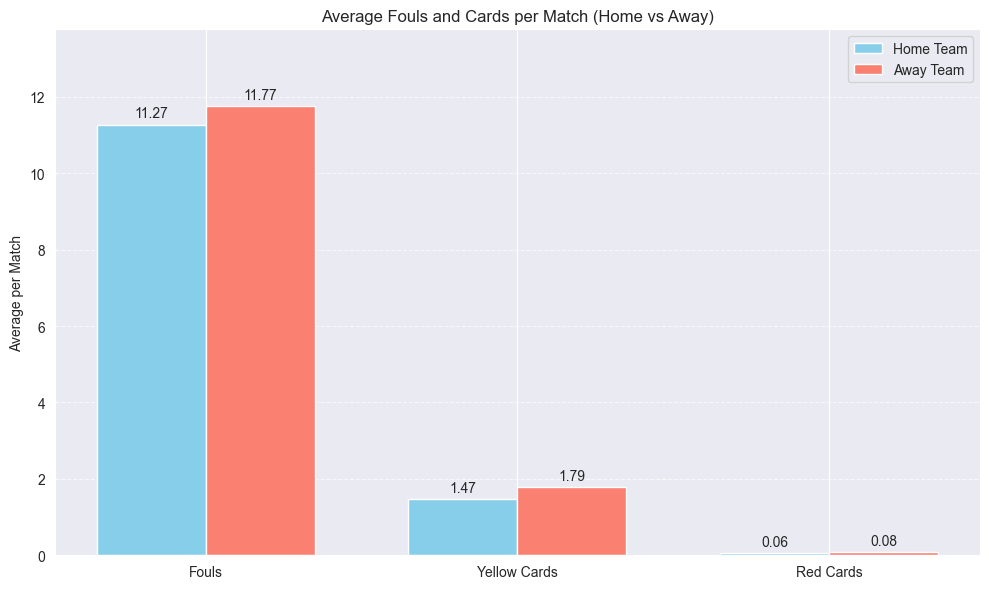

In [14]:
# Module: [Advanced Analysis2]
# Contributor: [Jun Sun]
import matplotlib.pyplot as plt
import numpy as np

# Compute averages
categories = ['Fouls', 'Yellow Cards', 'Red Cards']
home_values = [
    df['HomeFouls'].mean(),
    df['HomeYellowCards'].mean(),
    df['HomeRedCards'].mean()
]
away_values = [
    df['AwayFouls'].mean(),
    df['AwayYellowCards'].mean(),
    df['AwayRedCards'].mean()
]

x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width / 2, home_values, bar_width, label='Home Team', color='skyblue')
bars2 = ax.bar(x + bar_width / 2, away_values, bar_width, label='Away Team', color='salmon')


ax.bar_label(bars1, fmt='%.2f', padding=3)
ax.bar_label(bars2, fmt='%.2f', padding=3)

ax.set_ylabel('Average per Match')
ax.set_title('Average Fouls and Cards per Match (Home vs Away)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, max(max(home_values), max(away_values)) + 2)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

# Correlation between corner kicks and win rate

In [15]:
# Module: [Advanced Analysis3]
# Contributor: [Jun Sun]
import pandas as pd


df = pd.read_csv("cleaned_football_data.csv")

df['HomeWin'] = df['FullTimeResult'].apply(lambda x: 1 if x == 'H' else 0)
df['AwayWin'] = df['FullTimeResult'].apply(lambda x: 1 if x == 'A' else 0)

home_correlation = df[['HomeCorners', 'HomeWin']].corr().iloc[0, 1]
away_correlation = df[['AwayCorners', 'AwayWin']].corr().iloc[0, 1]

print("Correlation between Home Corners and Home Win:", home_correlation)
print("Correlation between Away Corners and Away Win:", away_correlation)

Correlation between Home Corners and Home Win: 0.03729438508325149
Correlation between Away Corners and Away Win: 0.041254808977986765


# Analysis of the relationship between goal difference and match outcome

Correlation between goal difference and match result: 0.856
Strong correlation: Goal difference is a good predictor of result.


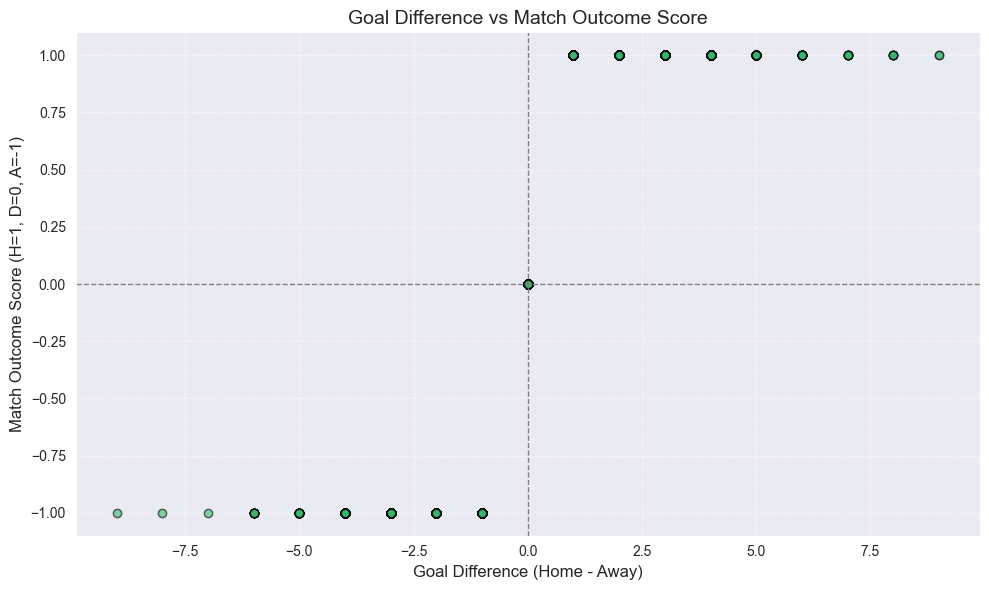

In [16]:
# Module: [Advanced Analysis4]
# Contributor: [Jun Sun]
import matplotlib.pyplot as plt
import pandas as pd

required_columns = ['FullTimeHomeGoals', 'FullTimeAwayGoals', 'FullTimeResult']
if not all(col in df.columns for col in required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    raise ValueError(f"Missing required columns: {missing}")

df_clean = df.dropna(subset=required_columns).copy()

df_clean['GoalDifference'] = df_clean['FullTimeHomeGoals'] - df_clean['FullTimeAwayGoals']

result_mapping = {'H': 1, 'D': 0, 'A': -1}
df_clean['MatchOutcomeScore'] = df_clean['FullTimeResult'].map(result_mapping)


df_clean = df_clean.dropna(subset=['MatchOutcomeScore'])
gd_corr = df_clean[['GoalDifference', 'MatchOutcomeScore']].corr().iloc[0, 1]


print(f"Correlation between goal difference and match result: {gd_corr:.3f}")
if abs(gd_corr) >= 0.7:
    print("Strong correlation: Goal difference is a good predictor of result.")
elif abs(gd_corr) >= 0.4:
    print("Moderate correlation: Goal difference has some predictive power.")
else:
    print("Weak correlation: Goal difference isn't strongly predictive of result.")


plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['GoalDifference'], df_clean['MatchOutcomeScore'],
    alpha=0.6, edgecolors='k', color='mediumseagreen'
)
plt.axhline(0, color='gray', linestyle='--', lw=1)
plt.axvline(0, color='gray', linestyle='--', lw=1)

plt.title('Goal Difference vs Match Outcome Score', fontsize=14)
plt.xlabel('Goal Difference (Home - Away)', fontsize=12)
plt.ylabel('Match Outcome Score (H=1, D=0, A=-1)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Liverpool vs Mancity

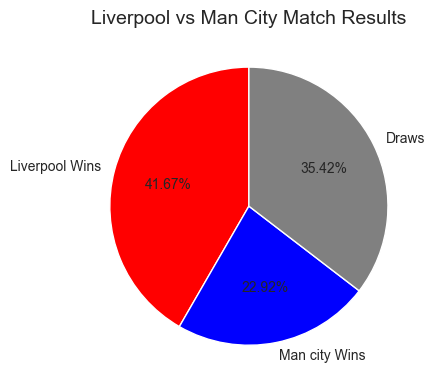

In [17]:
# Module: [Advanced Analysis5]
# Contributor: [Ruoyao Yan]
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(
    'cleaned_football_data.csv')

LvsM = []
for index, row in df.iterrows():
    home = row['HomeTeam']
    away = row['AwayTeam']
    if (home == 'Liverpool' and away == 'Man City') or (home == 'Man City' and away == 'Liverpool'):
        LvsM.append(row)

liverpool_vs_mancity = pd.DataFrame(LvsM)

total_liverpool_wins = len(liverpool_vs_mancity[((liverpool_vs_mancity['HomeTeam'] == 'Liverpool') & (liverpool_vs_mancity['FullTimeResult'] == 'H')) | ((liverpool_vs_mancity['AwayTeam'] == 'Liverpool') & (liverpool_vs_mancity['FullTimeResult'] == 'A'))])

total_mancity_wins = len(liverpool_vs_mancity[((liverpool_vs_mancity['HomeTeam'] == 'Man City') & (liverpool_vs_mancity['FullTimeResult'] == 'H')) | ((liverpool_vs_mancity['AwayTeam'] == 'Man City') & (liverpool_vs_mancity['FullTimeResult'] == 'A'))])

total_draws = len(liverpool_vs_mancity[liverpool_vs_mancity['FullTimeResult'] == 'D'])

labels = ['Liverpool Wins', 'Man city Wins', 'Draws']
counts = [total_liverpool_wins, total_mancity_wins, total_draws]
colors = ['red', 'blue', 'grey']

plt.figure(figsize=(6, 4))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
)

plt.title('Liverpool vs Man City Match Results', fontsize=14)
plt.tight_layout()
plt.show()

# Prediction

Predict the numeber of goals scored by Liverpool as the home team

Predicted goals: [2.37925558 1.9832334  1.67348925 1.5702412  2.4223946  2.75830774
 2.46553361 1.75056831 1.94009439 1.67348925 1.69045927 2.23286852
 1.86301533 1.85381636 1.41465516 2.06951143 2.65505969 1.48396317
 2.12962047 2.25903751 2.50867263 2.36228556 2.06951143 1.75056831
 2.11265045 1.73359829 1.52710218 1.81987632 1.71662826 1.73359829
 1.64732026 2.61192068 1.10491101 1.81987632 2.00020342 2.48250363
 1.9832334  1.45779417 2.12962047 1.14805002 2.36228556 2.4223946
 2.75830774 2.50867263 1.31140711 2.12962047 1.73359829 1.39768514
 2.25903751 2.02637242 2.08648145 1.44082415 1.9832334  1.9832334
 1.83684634 1.94009439 2.06951143 1.58721122 1.75056831 2.27600753
 3.274548   1.79370732 2.11265045 1.81987632 1.06177199 2.36228556
 2.30217653 2.06951143 1.48396317 2.08648145 1.73359829 2.25903751
 1.69045927 1.87998535 2.11265045 2.02637242 1.87998535 1.64732026
 2.65505969 2.27600753 2.77527777 1.69045927 2.31914655 1.7767373
 1.45779417 1.7767373  2.84458577 2.30217653 2.0

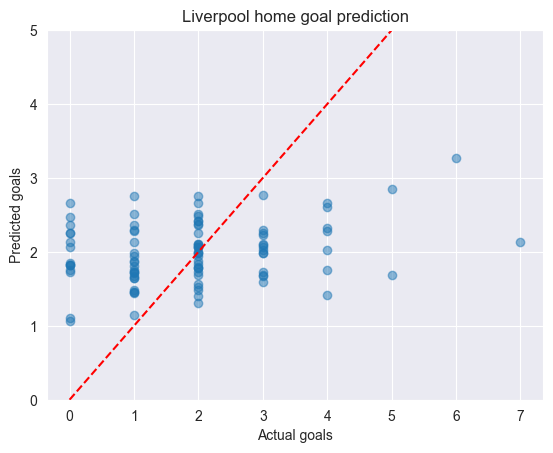

Season total goals: 38.0


In [18]:
# Module: [Prediction1]
# Contributor: [Ruoyao Yan]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

liverpool_home = df[df['HomeTeam'] == 'Liverpool'].copy()

features = ['HomeShotsOnTarget', 'AwayShotsOnTarget']
X = liverpool_home[features]
y = liverpool_home['FullTimeHomeGoals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted goals:", y_pred)
y_pred_rounded = np.round(y_pred).astype(int)
print("Predicted goals (rounded):", y_pred_rounded)
counter = Counter(y_pred_rounded)
most_common_pred, frequency = counter.most_common(1)[0]
print(f"Most frequently predicted goals: {most_common_pred} (appeared {frequency} times)")

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))
print("Maximum predicted value:", y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual goals")
plt.ylabel("Predicted goals")
plt.title("Liverpool home goal prediction")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal line
plt.ylim(0, 5)
plt.show()

total_goals_method1 = most_common_pred * 19
print(f"Season total goals: {total_goals_method1:.1f}")


Predict Liverpool's specific winnning rate in home games

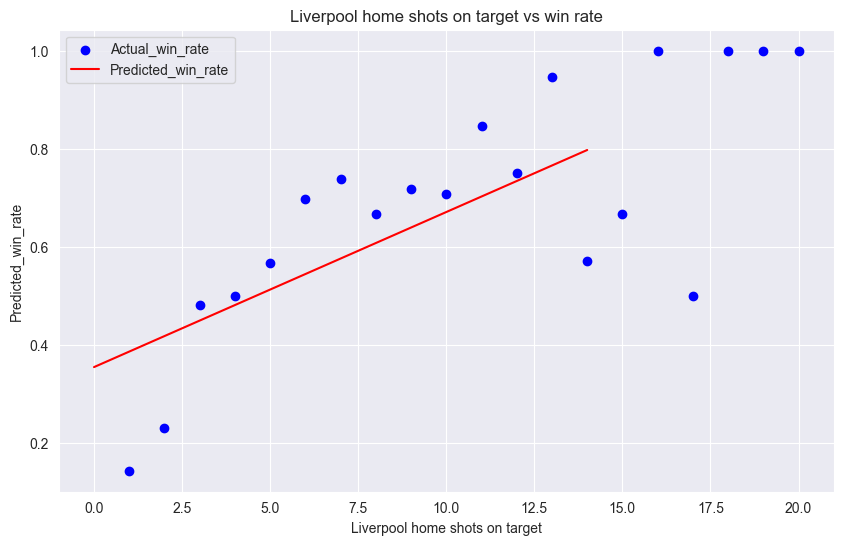

Projected average home shots on target for Liverpool next season 4，Predicted win rate：48.1%
Predicted goals: [2.37925558 1.9832334  1.67348925 1.5702412  2.4223946  2.75830774
 2.46553361 1.75056831 1.94009439 1.67348925 1.69045927 2.23286852
 1.86301533 1.85381636 1.41465516 2.06951143 2.65505969 1.48396317
 2.12962047 2.25903751 2.50867263 2.36228556 2.06951143 1.75056831
 2.11265045 1.73359829 1.52710218 1.81987632 1.71662826 1.73359829
 1.64732026 2.61192068 1.10491101 1.81987632 2.00020342 2.48250363
 1.9832334  1.45779417 2.12962047 1.14805002 2.36228556 2.4223946
 2.75830774 2.50867263 1.31140711 2.12962047 1.73359829 1.39768514
 2.25903751 2.02637242 2.08648145 1.44082415 1.9832334  1.9832334
 1.83684634 1.94009439 2.06951143 1.58721122 1.75056831 2.27600753
 3.274548   1.79370732 2.11265045 1.81987632 1.06177199 2.36228556
 2.30217653 2.06951143 1.48396317 2.08648145 1.73359829 2.25903751
 1.69045927 1.87998535 2.11265045 2.02637242 1.87998535 1.64732026
 2.65505969 2.27600753

In [19]:
# Module: [Prediction2]
# Contributor: [Ruoyao Yan]
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

liverpool_home = df[df['HomeTeam'] == 'Liverpool'].copy()
liverpool_home['HomeWin'] = (liverpool_home['FullTimeResult'] == 'H').astype(int)
win_rate_by_shots = liverpool_home.groupby('HomeShotsOnTarget')['HomeWin'].mean().reset_index()
win_rate_by_shots.columns = ['HomeShotsOnTarget', 'WinRate']

X = win_rate_by_shots[['HomeShotsOnTarget']]
y = win_rate_by_shots['WinRate']
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

X_test = pd.DataFrame(np.arange(0, 15).reshape(-1, 1), columns=['HomeShotsOnTarget'])
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual_win_rate')
plt.plot(X_test, y_pred, color='red', label='Predicted_win_rate')
plt.xlabel('Liverpool home shots on target')
plt.ylabel('Predicted_win_rate')
plt.title('Liverpool home shots on target vs win rate')
plt.legend()
plt.grid(True)
plt.show()
next_season_shots = 4
predicted_win_rate = model.predict(pd.DataFrame({'HomeShotsOnTarget': [next_season_shots]}))
print(f"Projected average home shots on target for Liverpool next season {next_season_shots}，Predicted win rate：{predicted_win_rate[0]:.1%}")

features = ['HomeShotsOnTarget', 'AwayShotsOnTarget']
X = liverpool_home[features]
y = liverpool_home['FullTimeHomeGoals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Predicted goals:", y_pred)
y_pred_rounded = np.round(y_pred).astype(int)
print("Predicted goals (rounded):", y_pred_rounded)
counter = Counter(y_pred_rounded)
most_common_pred, frequency = counter.most_common(1)[0]
print(f"Most frequently predicted goals: {most_common_pred} (appeared {frequency} times)")

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))
print("Maximum predicted value:", y_pred.max())

Predicting goals using cards and corner kicks

MSE: 2.76
MAE: 1.32
R²: 0.00

The impact of each feature on the total number of goals (sorted by absolute value):
            Feature  Coefficient  AbsoluteEffect
2     TotalRedCards     0.106169        0.106169
0      TotalCorners    -0.018350        0.018350
1  TotalYellowCards    -0.014143        0.014143


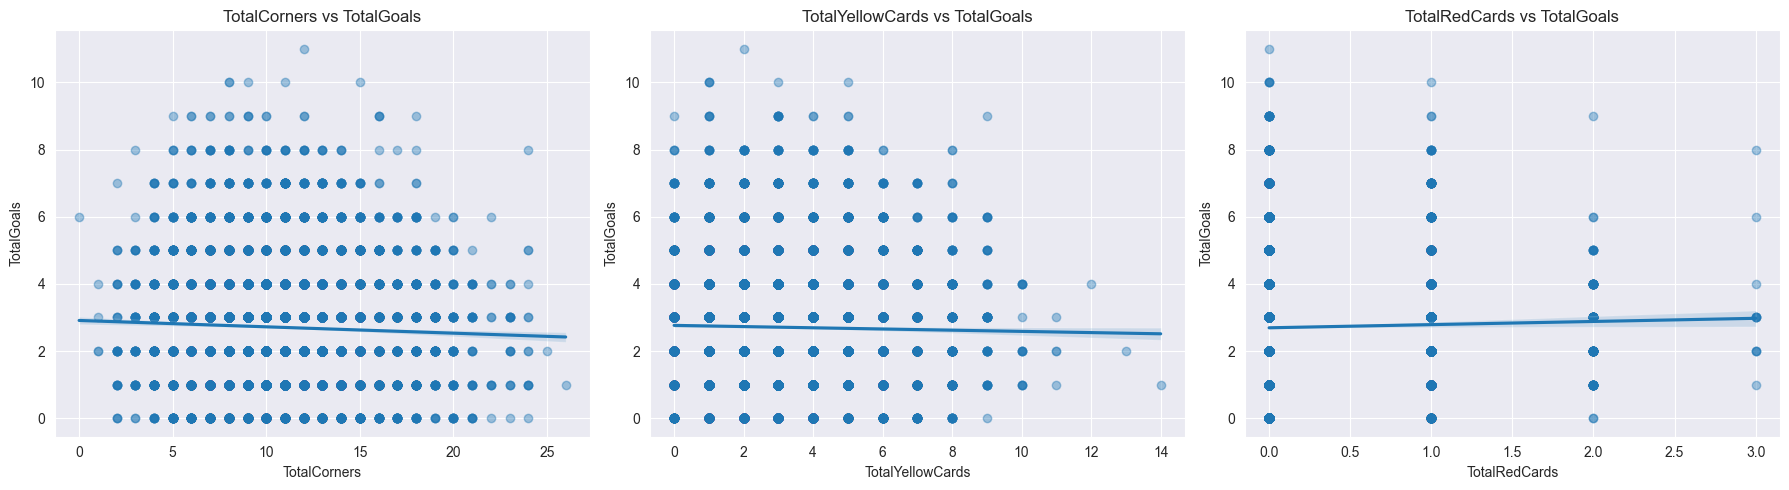


Predict the number of goals in the match: 2.8


In [20]:
# Module: [Prediction3]
# Contributor: [Ruoyao Yan] and [Jun Sun]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df = pd.read_csv('cleaned_football_data.csv')
df['TotalGoals'] = df['FullTimeHomeGoals'] + df['FullTimeAwayGoals']
df['TotalCorners'] = df['HomeCorners'] + df['AwayCorners']
df['TotalYellowCards'] = df['HomeYellowCards'] + df['AwayYellowCards']
df['TotalRedCards'] = df['HomeRedCards'] + df['AwayRedCards']

features = ['TotalCorners', 'TotalYellowCards', 'TotalRedCards']
target = 'TotalGoals'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'AbsoluteEffect': np.abs(model.coef_)
}).sort_values(by='AbsoluteEffect', ascending=False)

print("\nThe impact of each feature on the total number of goals (sorted by absolute value):")
print(coef_df)


plt.figure(figsize=(18, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.regplot(x=feature, y='TotalGoals', data=df, scatter_kws={'alpha': 0.4})
    plt.title(f"{feature} vs TotalGoals")
    plt.xlabel(feature)
    plt.ylabel("TotalGoals")

plt.tight_layout()
plt.show()

# example
new_data = pd.DataFrame([[12, 4, 1]], columns=features)  # 12角球、4黄牌、1红牌
predicted_goal = model.predict(new_data)[0]
print(f"\nPredict the number of goals in the match: {predicted_goal:.1f}")